In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from scipy.io import arff

In [3]:
# Read data


df1=pd.read_csv("/content/shuttle_train.data",sep=' ')
print(df1)
print(df1.shape)

print(df1[df1.isnull().any(axis=1)])
#print(df1.size)

       50  21   77  0  28  0.1  27  48  22  2
0      55   0   92  0   0   26  36  92  56  4
1      53   0   82  0  52   -5  29  30   2  1
2      37   0   76  0  28   18  40  48   8  1
3      37   0   79  0  34  -26  43  46   2  1
4      85   0   88 -4   6    1   3  83  80  5
...    ..  ..  ... ..  ..  ...  ..  ..  .. ..
43494  46   5   78  0  46    5  32  32   0  1
43495  37   0   79 -1  10    3  43  69  26  1
43496  48   0   78  3  46    0  30  32   2  1
43497  41   0   79  0  38  -25  38  40   2  1
43498  40  -3  100  0  38    0  61  62   2  1

[43499 rows x 10 columns]
(43499, 10)
Empty DataFrame
Columns: [50, 21, 77, 0, 28, 0.1, 27, 48, 22, 2]
Index: []


In [4]:
# Read data


df2=pd.read_csv("/content/shuttle_test.data",sep=' ')
print(df2)
print(df2.shape)

print(df1[df1.isnull().any(axis=1)])
#print(df1.size)

       55  0   81  0.1  -6  11  25   88   64  4
0      56  0   96    0  52  -4  40   44    4  4
1      50 -1   89   -7  50   0  39   40    2  1
2      53  9   79    0  42  -2  25   37   12  4
3      55  2   82    0  54  -6  26   28    2  1
4      41  0   84    3  38  -4  43   45    2  1
...    .. ..  ...  ...  ..  ..  ..  ...  ... ..
14494  80  0   84    0 -36 -29   4  120  116  5
14495  55  0   81    0 -20  25  26  102   76  4
14496  55  0   77    0  12 -22  22   65   42  4
14497  37  0  103    0  18 -16  66   85   20  1
14498  56  2   98    0  52   1  42   46    4  4

[14499 rows x 10 columns]
(14499, 10)
Empty DataFrame
Columns: [50, 21, 77, 0, 28, 0.1, 27, 48, 22, 2]
Index: []


In [6]:
# Copy the DataFrame
df_copy = df1.iloc[:, 0:10]
df2_copy= df2.iloc[:, 0:10]
print(df_copy.shape)
print(df2_copy.shape)


(43499, 10)
(14499, 10)


In [7]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE train data set
smote = SMOTE(sampling_strategy='auto',  random_state=42)
X = df_copy.iloc[:, :9].values
y = df_copy.iloc[:, 9].values


# Apply SMOTE to your data
X_resampled_train, y_resampled_train = smote.fit_resample(X, y)


In [18]:
XX = df2_copy.iloc[:, :9].values
yy = df2_copy.iloc[:, 9].values
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE train data set
smote = SMOTE(k_neighbors=1, random_state=42)



# Apply SMOTE to your data
X_resampled_test, y_resampled_test = smote.fit_resample(XX, yy)

In [19]:
# Copy the DataFrame
#df_copy = df1.iloc[:, 0:10]
#df2_copy= df2.iloc[:, 0:10]
#print(df_copy.shape)
# Extract features (assuming columns 0 to 8 are features)

Xx = X_resampled_train
print(Xx.shape)
# Standardize the data
scaler = StandardScaler()
Sdata = scaler.fit_transform(Xx)

# Apply PCA
pca = PCA(n_components=9)
pca.fit(Sdata)
print(pca.singular_values_)


(238756, 9)
[916.7432043  660.23390554 546.73403066 486.89824046 477.50991786
 328.96065332  10.80330624   9.54855849   7.09725437]


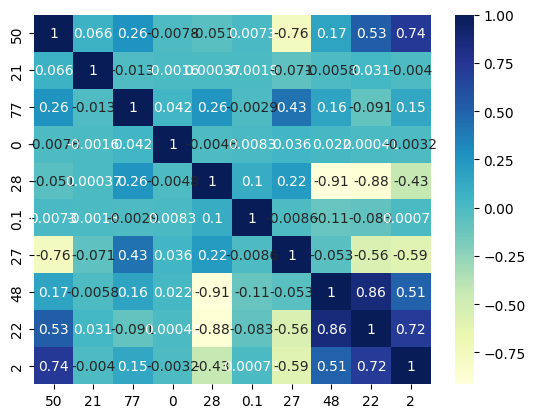

In [20]:
# Correlation matrix
corr=df_copy.corr()

# Plot Heatmap on correlation matrix
sb.heatmap(corr, annot=True, cmap='YlGnBu')

plt.show()

We select only 6  attributes

In [21]:
X_train = X_resampled_train
y_train = y_resampled_train

X_test = X_resampled_test  # Features for testing
y_test = y_resampled_test  # Target variable for testing (if available)


In [22]:
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=6),
                        MLPClassifier(hidden_layer_sizes=(6,), random_state=1, max_iter=1000))


# accuracy
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_train)
print(np.mean(y_pred == y_train))

0.9995560320997169


In [26]:
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=6),
                        MLPClassifier(hidden_layer_sizes=(6,), random_state=1, max_iter=2000))


pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

# training accuracy
y_trainpred=pipe_lr.predict(X_train)
print(np.mean(y_trainpred == y_train))

# test accuracy
y_pred = pipe_lr.predict(X_test)
print(pipe_lr.score(X_test, y_test))

0.999572785605388
0.9919473278072337


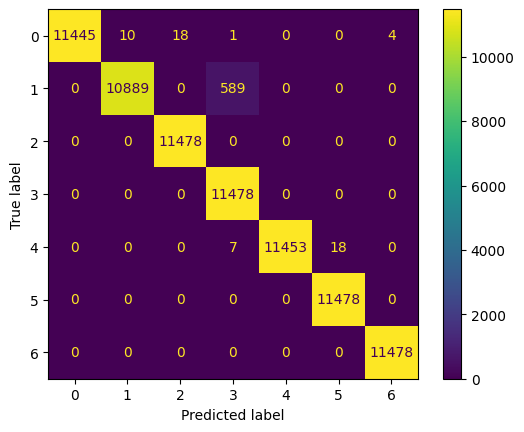

In [27]:
cm0 = confusion_matrix(y_test, y_pred)
cm0_display = ConfusionMatrixDisplay(cm0).plot()
plt.show()

In [33]:
from sklearn import svm

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=9),
                        svm.SVC(max_iter=1000))


pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

# training accuracy
y_trainpred=pipe_lr.predict(X_train)
print(np.mean(y_trainpred == y_train))

# test accuracy
y_pred = pipe_lr.predict(X_test)
print(pipe_lr.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.9378863777245389
0.9267418415353595


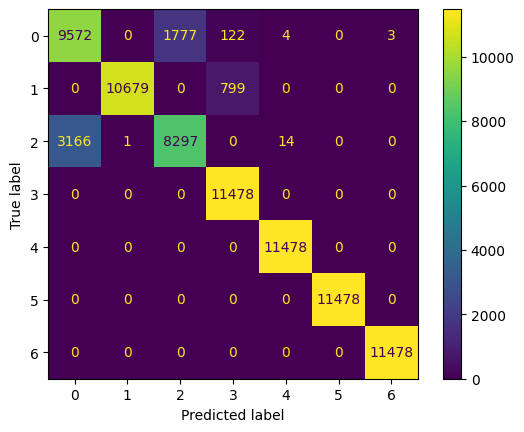

In [34]:
cm0 = confusion_matrix(y_test, y_pred)
cm0_display = ConfusionMatrixDisplay(cm0).plot()
plt.show()

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=6),
                        LogisticRegression(max_iter=1000))


pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

# training accuracy
y_trainpred=pipe_lr.predict(X_train)
print(np.mean(y_trainpred == y_train))

# test accuracy
y_pred = pipe_lr.predict(X_test)
print(pipe_lr.score(X_test, y_test))

0.9443699844192397
0.8979662957707913


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


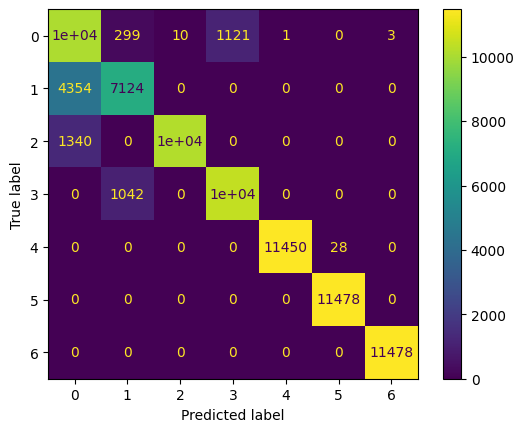

In [37]:
cm0 = confusion_matrix(y_test, y_pred)
cm0_display = ConfusionMatrixDisplay(cm0).plot()
plt.show()